# Week 3 Day 5 Mission

## Mission 1. Netflix and Code

### Mandatory Part

In [11]:
import pandas as pd

In [21]:
netflix = pd.read_csv("./netflix_titles.csv")
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
netflix_by_country = netflix['title'].groupby(by=netflix.country).count()
netflix_by_country['South Korea']

183

### Bonus Part

In [22]:
netflix_by_country = netflix['title'].groupby(by=netflix.country).count()
netflix_by_country[netflix_by_country == netflix_by_country.max()]

country
United States    2555
Name: title, dtype: int64

### Mission 2. 가즈아!

### Mandatory Part

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

bitcoin = pd.read_csv("./BitCoin.csv")
bitcoin.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [153]:
# Date column의 데이터를 datetime 타입으로 바꾸기
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# 날짜를 기준으로 정렬
bitcoin = bitcoin.sort_values('Date')
# 날짜를 인덱스로 변경
bitcoin = bitcoin.set_index('Date')

In [154]:
# 사용하지 않는 열 삭제
bitcoin = bitcoin.drop('Unnamed: 0', axis=1)

In [155]:
# 특정 기간의 데이터만 남기기
coin_1617 = bitcoin.loc['2016-06-01': '2017-06-30'].copy()

In [156]:
# 5일 이동평균(Open 기준)
coin_1617['MA5'] = coin_1617.Open.rolling(5).mean()

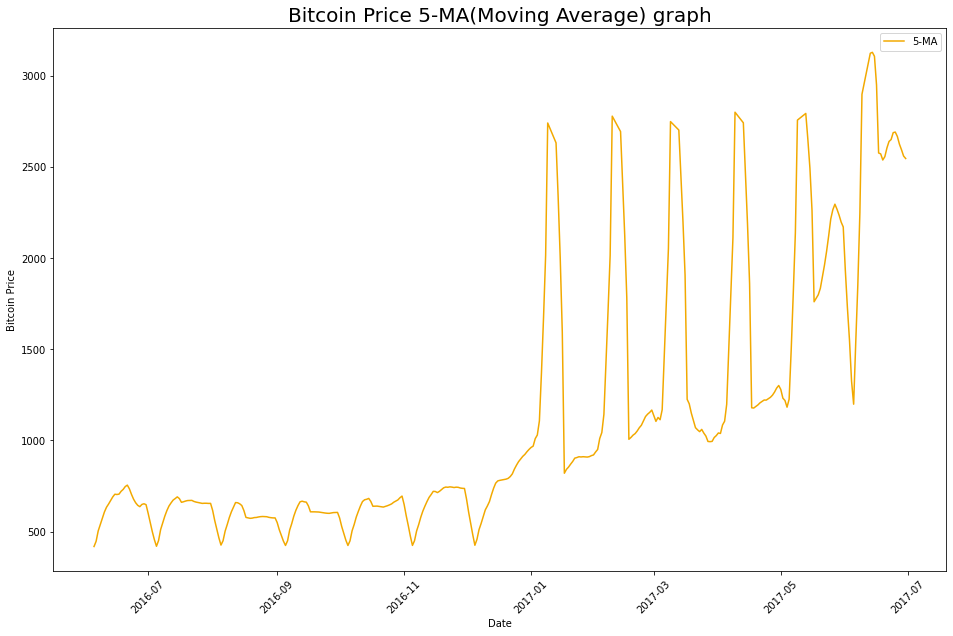

In [157]:
# Plot으로 표현
plt.figure(figsize=(16, 10))
plt.plot(coin_1617.MA5, color="#f2a900", label='5-MA' )
plt.xticks(rotation=45)
plt.title("Bitcoin Price 5-MA(Moving Average) graph", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

### Bonus Part

In [166]:
bitcoin = pd.read_csv('./BitCoin.csv')
ethereum = pd.read_csv('./ETH_day.csv')
ethereum.head(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [167]:
# Date column의 데이터를 datetime 타입으로 바꾸기
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
ethereum['Date'] = pd.to_datetime(ethereum['Date'])

# 날짜를 기준으로 정렬
bitcoin = bitcoin.sort_values('Date')
ethereum = ethereum.sort_values('Date')

# 날짜를 인덱스로 변경
bitcoin = bitcoin.set_index('Date')
ethereum = ethereum.set_index('Date')

# 특정 기간의 데이터만 남기기
bitcoin_1617 = bitcoin.loc['2016-06-01': '2017-06-30'].copy()
ethereum_1617 = ethereum.loc['2016-06-01': '2017-06-30'].copy()

# 5일 이동평균(Open 기준)
bitcoin_1617['MA5'] = bitcoin_1617.Open.rolling(5).mean()
ethereum_1617['MA5'] = ethereum_1617.Open.rolling(5).mean()

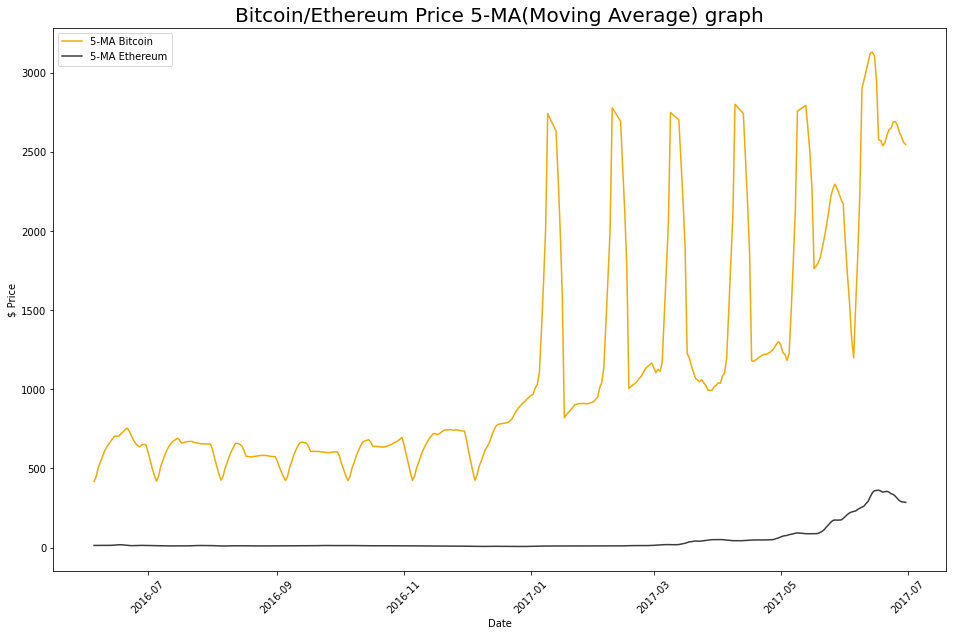

In [168]:
# Plot으로 표현
plt.figure(figsize=(16, 10))

plt.plot(bitcoin_1617.MA5, color="#f2a900", label='5-MA Bitcoin' )
plt.plot(ethereum_1617.MA5, color="#3c3c3d", label='5-MA Ethereum' )

plt.xticks(rotation=45)
plt.title("Bitcoin/Ethereum Price 5-MA(Moving Average) graph", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('$ Price')

plt.legend()
plt.show()